In [28]:
import pandas as pd
import joblib
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load the LightGBM model
model = joblib.load('../lightgbm_model.joblib')

# Load the test dataset
X_test = pd.read_csv('../Dataset/xtest.csv')

In [29]:
# Randomly sample a row from the test dataset
single_record = X_test.sample(n=1)

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the sampled row
shap_values = explainer.shap_values(single_record)

# Predict the outcome using the model
prediction = model.predict(single_record)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [30]:
# Assuming binary classification and using the appropriate class index based on the prediction
class_index = int(prediction[0])  # Assuming the prediction is [0] or [1]

# Create a DataFrame for SHAP values
feature_names = X_test.columns
shap_df = pd.DataFrame({
    'feature': feature_names,
    'shap_value': shap_values[class_index][0]  # Adjust indexing based on SHAP values structure
})
shap_df['abs_shap_value'] = shap_df['shap_value'].abs()
top_features = shap_df.sort_values(by='abs_shap_value', ascending=False).head(3)

# Generate textual explanation
intro = "The following 3 variables most significantly influenced the prediction:"
details = []
for idx, row in top_features.iterrows():
    details.append(f"{idx + 1}. {row['feature']} with an impact value of {row['shap_value']:.3f}")
explanation = f"{intro}\n" + "\n".join(details)
print(explanation)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [31]:
shap_df

,feature,shap_value,abs_shap_value
0,mean_HR_sleep,3.643487,3.643487
1,HR_var_sleep,0.044159,0.044159
2,mean_RR_sleep,1.229932,1.229932
3,RR_var_sleep,4.581203,4.581203
4,WASO_sleep,-0.033839,0.033839
5,SOL_sleep,0.413631,0.413631
6,TIB_sleep,0.124904,0.124904
7,TST_sleep,-0.511870,0.511870
8,SE_sleep,0.055231,0.055231
9,Heart Rate,0.369892,0.369892


In [16]:
# Print out the shapes and actual SHAP values for a sanity check
print("Shape of SHAP values array:", np.array(shap_values).shape)
print("SHAP values for class 0:", shap_values[0])
print("SHAP values for class 1:", shap_values[1])

Shape of SHAP values array: (1, 10)
SHAP values for class 0: [-4.34760113  0.65282518  0.17053347  0.30322279  0.95245425  0.16650952
 -1.13458504  0.15253409  0.05391098 -0.80664074]


IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 800x400 with 0 Axes>

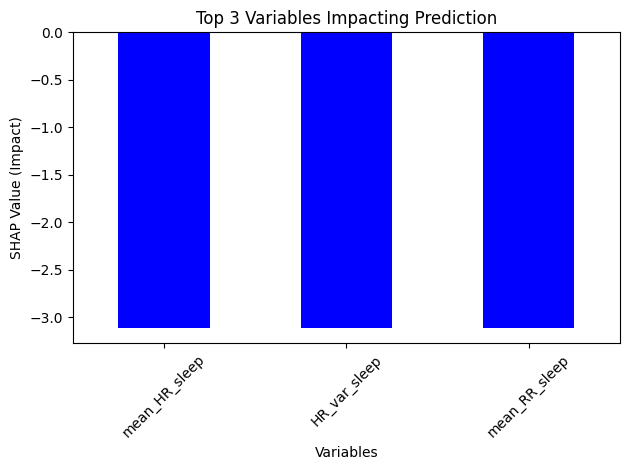

In [6]:
# Plotting
colors = ['red' if x > 0 else 'blue' for x in top_features['shap_value']]
plt.figure(figsize=(8, 4))
top_features.plot.bar(x='feature', y='shap_value', legend=False, color=colors)
plt.title('Top 3 Variables Impacting Prediction')
plt.xlabel('Variables')
plt.ylabel('SHAP Value (Impact)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The following 3 variables most significantly influenced the prediction:
4. RR_var_sleep with an impact value of 4.918
1. mean_HR_sleep with an impact value of 2.937
7. TIB_sleep with an impact value of -1.793
3. mean_RR_sleep with an impact value of 0.957
5. WASO_sleep with an impact value of 0.903
8. TST_sleep with an impact value of 0.410
9. SE_sleep with an impact value of 0.387
10. Heart Rate with an impact value of 0.255
6. SOL_sleep with an impact value of -0.072
2. HR_var_sleep with an impact value of 0.002


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


<Figure size 800x400 with 0 Axes>

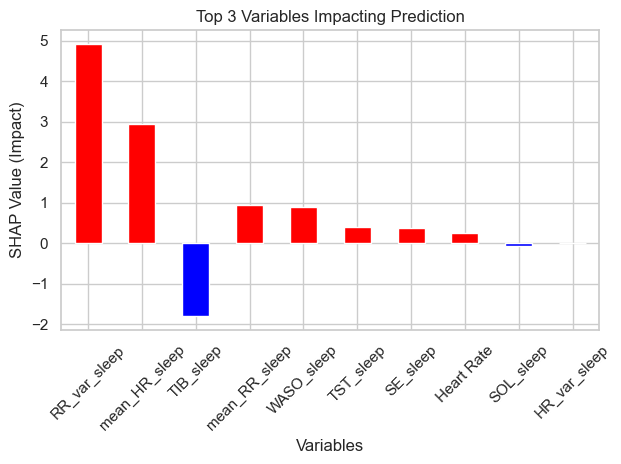

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import shap

# Randomly sample a row from the test dataset
single_record = X_test.sample(n=1)

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the sampled row
shap_values = explainer.shap_values(single_record)

# Predict the outcome using the model
prediction = model.predict(single_record)

# For binary classification, SHAP returns the values for the positive class only in shap_values[0]
# If model is LightGBM and binary classification, you may get SHAP values for one class in a list

# Check if the SHAP values are in the expected format (list with one element)
if isinstance(shap_values, list):
    shap_values_single = shap_values[0]  # shap_values[0] will contain the actual SHAP values for binary classification
else:
    shap_values_single = shap_values

# Create a DataFrame for SHAP values
feature_names = X_test.columns
shap_df = pd.DataFrame({
    'feature': feature_names,
    'shap_value': shap_values_single[0]  # Assuming shap_values_single is correctly formatted for single instance
})
shap_df['abs_shap_value'] = shap_df['shap_value'].abs()
top_features = shap_df.sort_values(by='abs_shap_value', ascending=False)

# Generate textual explanation
intro = "The following 3 variables most significantly influenced the prediction:"
details = []
for idx, row in top_features.iterrows():
    details.append(f"{idx + 1}. {row['feature']} with an impact value of {row['shap_value']:.3f}")
explanation = f"{intro}\n" + "\n".join(details)
print(explanation)

# Plotting
colors = ['red' if x > 0 else 'blue' for x in top_features['shap_value']]
plt.figure(figsize=(8, 4))
top_features.plot.bar(x='feature', y='shap_value', legend=False, color=colors)
plt.title('Variables Impacting Prediction')
plt.xlabel('Variables')
plt.ylabel('SHAP Value (Impact)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

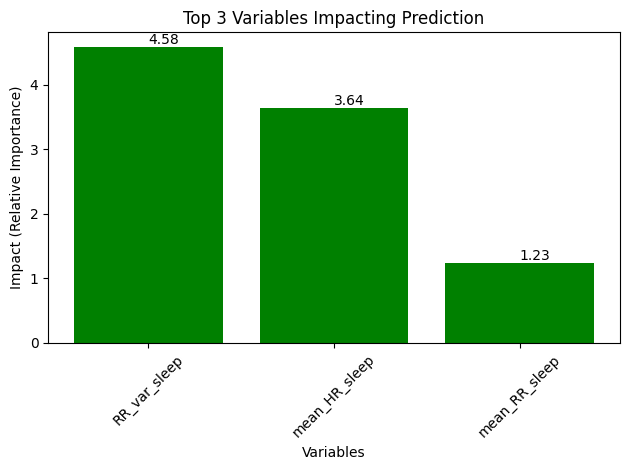

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'top_features' is your DataFrame with the top features and their SHAP values
features = top_features['feature']
impacts = top_features['shap_value']

colors = ['green' if x > 0 else 'red' for x in impacts]  # Green for positive, red for negative
fig, ax = plt.subplots()
bars = ax.bar(features, impacts, color=colors)

# Adding value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

ax.set_title('Top 3 Variables Impacting Prediction')
ax.set_xlabel('Variables')
ax.set_ylabel('Impact (Relative Importance)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

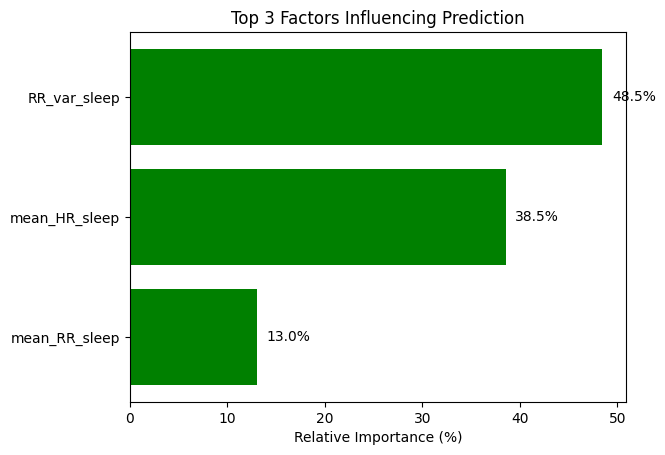

In [19]:
import matplotlib.pyplot as plt

# Assume 'top_features' contains the top features and their SHAP values
total_impact = top_features['shap_value'].abs().sum()
top_features['relative_importance'] = top_features['shap_value'].abs() / total_impact * 100

# Sorting features by importance for better visual layout
top_features = top_features.sort_values(by='relative_importance', ascending=True)

# Creating the plot
fig, ax = plt.subplots()
bars = ax.barh(top_features['feature'], top_features['relative_importance'], color='green')
ax.set_xlabel('Relative Importance (%)')
ax.set_title('Top 3 Factors Influencing Prediction')

# Adding the data labels inside the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1  # shift the text to the right side of the bar
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

plt.show()

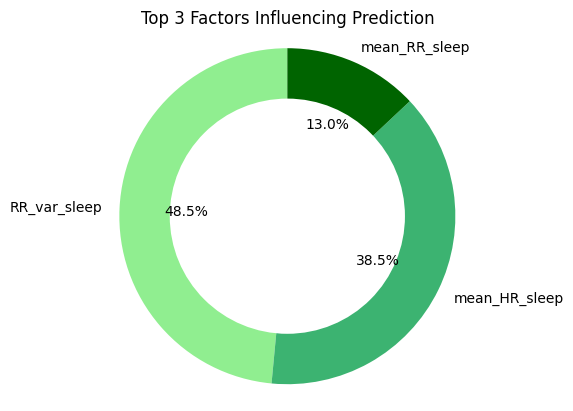

In [21]:
import matplotlib.pyplot as plt

# Assume 'top_features' contains the top features and their relative importance
# Here we create dummy data to illustrate; please replace it with your actual data
top_features = pd.DataFrame({
    'feature': ['RR_var_sleep', 'mean_HR_sleep', 'mean_RR_sleep'],
    'relative_importance': [48.5, 38.5, 13.0]
})

labels = top_features['feature']
sizes = top_features['relative_importance']
colors = ['lightgreen', 'mediumseagreen', 'darkgreen']  # Different shades of green for visual appeal

# Create a pie chart with a hole in the middle (donut chart)
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.5))

# Add a circle at the center to create a donut-like chart
centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=0)
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 Factors Influencing Prediction')
plt.show()

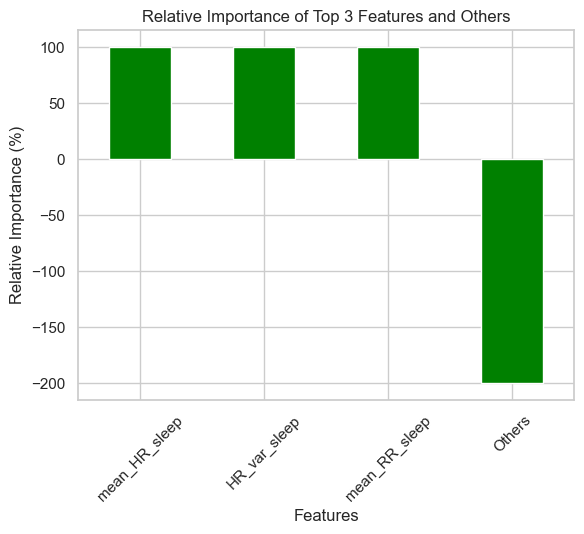

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'shap_values' is obtained for the entire test set (to simplify)
# Calculating the mean absolute SHAP value for each feature across all data
total_shap_values = abs(shap_values[0]).mean(axis=0)
total_importance = total_shap_values.sum()

# Create DataFrame for SHAP values and calculate relative importance
all_features_df = pd.DataFrame({
    'feature': X_test.columns,
    'shap_value': total_shap_values,
    'relative_importance': (total_shap_values / total_importance) * 100
})

# Sort and select top 3 features
top_3_features = all_features_df.sort_values(by='relative_importance', ascending=False).head(3)
# Calculate the importance of "Others"
others_importance = pd.DataFrame({
    'feature': ['Others'],
    'relative_importance': [100 - top_3_features['relative_importance'].sum()]
})

# Combine top 3 with others for final visualization
final_features_df = pd.concat([top_3_features, others_importance])

# Plotting
fig, ax = plt.subplots()
final_features_df.plot(kind='bar', x='feature', y='relative_importance', legend=False, ax=ax, color='green')
ax.set_title('Relative Importance of Top 3 Features and Others')
ax.set_xlabel('Features')
ax.set_ylabel('Relative Importance (%)')
plt.xticks(rotation=45)
plt.show()